In [1]:
import pandas as pd
import chardet
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from ClassNeuronaLineal import NeuronaLineal


def open_file(path):
    # open the path with automatic encoding
    with open(path, 'rb') as file:
        encoding = chardet.detect(file.read())
    
    return pd.read_csv(path, encoding=encoding['encoding'])

data = open_file("../Datos/AUTOS.csv")

data = data.select_dtypes(include=np.number)
data

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,symboling
0,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,3
1,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,3
2,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,1
3,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,2
4,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,95.0,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0,-1
201,95.0,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0,-1
202,95.0,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0,-1
203,95.0,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0,-1


In [30]:
# Calcula el promedio de cada columna numérica
AVG_data = data.mean()

# Rellena los valores nulos en df_numeric con los promedios respectivos
data = data.fillna(AVG_data)


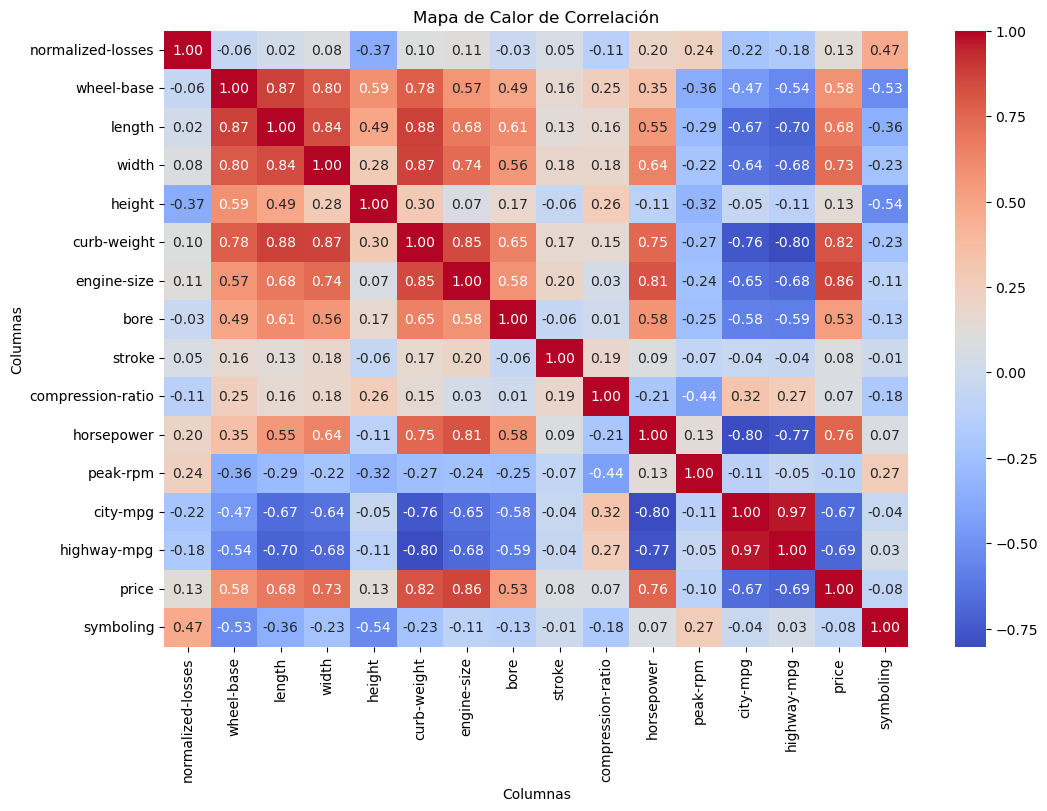

In [31]:
# Calcula la matriz de correlación entre las columnas numéricas
correlation_matrix = data.corr()

# Crea un mapa de calor (heatmap) de la matriz de correlación
plt.figure(figsize=(12, 8))  # Ajusta el tamaño de la figura si es necesario
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Configura las etiquetas de los ejes y el título
plt.xlabel("Columnas")
plt.ylabel("Columnas")
plt.title("Mapa de Calor de Correlación")

# Muestra el mapa de calor
plt.show()


In [59]:
precio = data['price'].copy() # T::target
ejemplos = data.drop(columns=['price']).copy()
T = precio[:-1].values.reshape(-1, 1)


In [60]:
alfa = 0.05
MAX_ITE = 200
CotaError = 10e-03
CANT_PLOTS = 6

In [61]:
NORMALIZACION = {0:'Sin Normalizar',
                1: 'Lineal Uniforme',
                2: 'Media y Desvio'}
from sklearn import model_selection,preprocessing

def normalizacion(aux, X):
    if aux==1: 
        normalizador= preprocessing.MinMaxScaler()
    elif aux==2:
        normalizador= preprocessing.StandardScaler()
    else:
        return X
    X = normalizador.fit_transform(X)
    return X

In [62]:

for N in [1, 2]:
    # print(NORMALIZACION[N])
    X = normalizacion(N, ejemplos)
    w_acc = np.zeros(len(ejemplos[0])) # PESOS
    
    fig,subs=plt.subplots(1, CANT_PLOTS, sharex='col', sharey='row', figsize=(16,1.5))
    print(NORMALIZACION[N])
    for i in range(0, CANT_PLOTS):
        modelo = NeuronaLineal(alpha=alfa, n_iter=MAX_ITE, cotaE=CotaError)
        modelo.fit(X, T)


KeyError: 0